<a href="https://colab.research.google.com/github/kushagrasrivas/Vegetable_classification/blob/main/Vegetable_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

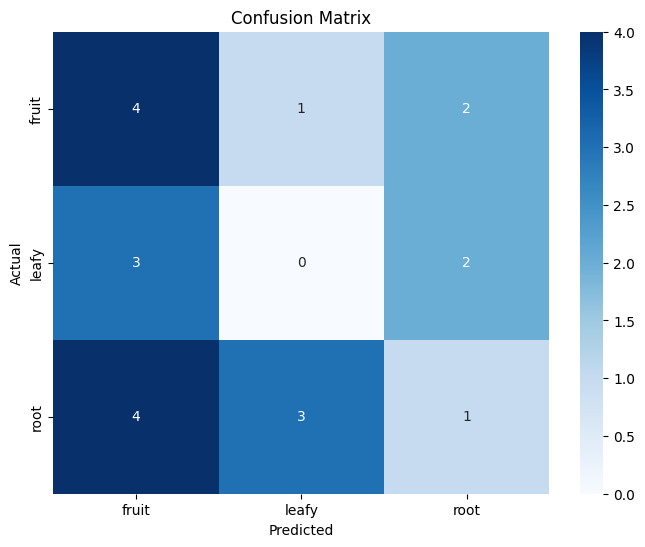

Accuracy: 0.25
Precision (macro): 0.1878787878787879
Recall (macro): 0.23214285714285712

Classification Report:
               precision    recall  f1-score   support

       fruit       0.36      0.57      0.44         7
       leafy       0.00      0.00      0.00         5
        root       0.20      0.12      0.15         8

    accuracy                           0.25        20
   macro avg       0.19      0.23      0.20        20
weighted avg       0.21      0.25      0.22        20



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv('vegetables.csv')

# Step 2: Preprocess Data
X = df.drop('type', axis=1)
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # macro for multiclass
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
